In [25]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Lambda,BatchNormalization,MaxPooling2D,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [26]:
# Function to generate dataset
def generate_dataset(num_images):
    images = []
    labels = []
    for _ in range(num_images):
        image = np.zeros((50, 50), dtype=np.float32)
        x, y = np.random.randint(0, 50, size=2)
        image[x, y] = 255
        images.append(image)
        labels.append([x, y])
    return np.array(images), np.array(labels)

In [27]:
# Generate dataset
num_images = 25000
X, y = generate_dataset(num_images)

In [28]:
# Reshape for the CNN
X = X.reshape((X.shape[0], 50, 50, 1))  

In [29]:
# Split into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Build the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(2)
])

In [31]:
#Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

In [38]:
# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.2304 - val_loss: 0.3017
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.4449 - val_loss: 0.2167
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2207 - val_loss: 0.2348
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2356 - val_loss: 0.2100
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2048 - val_loss: 0.1322
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1615 - val_loss: 0.3123
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.2124 - val_loss: 0.2178
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1697 - val_loss: 0.1527
Epoch 9/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1602 - val_loss: 0.1556
Epoch 10/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1679 - val_loss: 0.2844
Epoch 11/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.1380 - val_loss: 0.0415
Epoch 12/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/ste

In [39]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Validation loss: {loss}')

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296
Validation loss: 0.030182190239429474


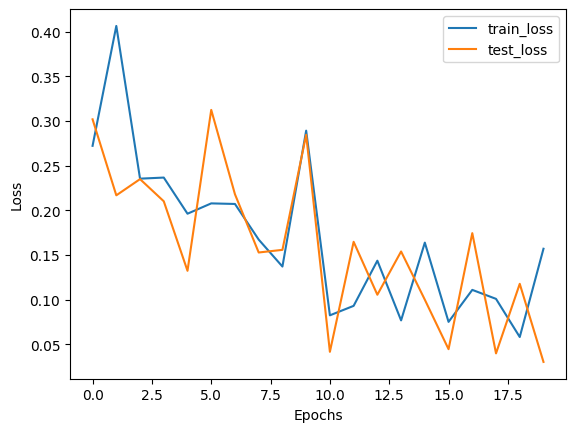

In [40]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


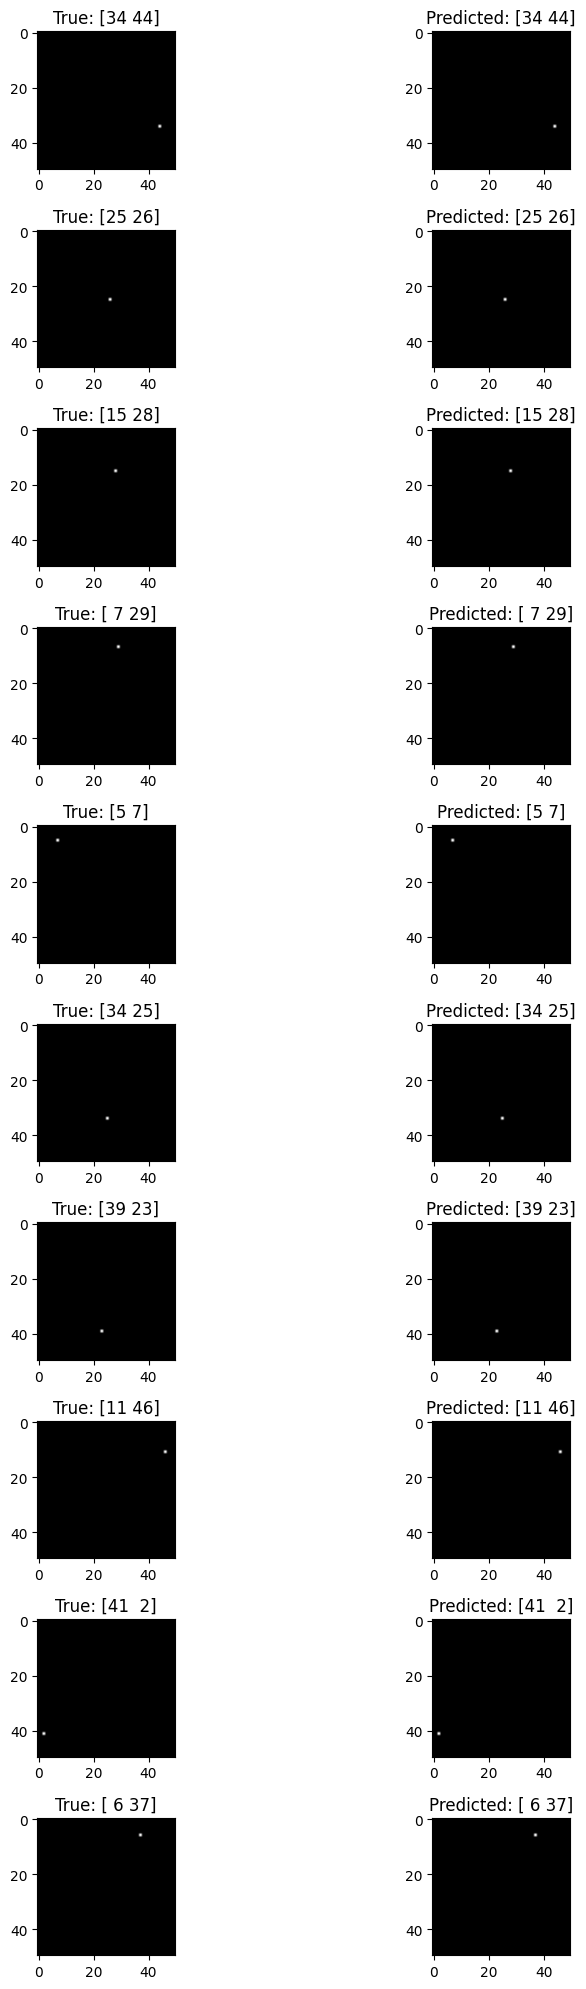

In [41]:
# Visualize some predictions
n = 10
fig, axs = plt.subplots(n, 2, figsize=(10, 2*n))
for i in range(n):
    axs[i, 0].imshow(X_test[i].reshape(50, 50), cmap='gray')
    axs[i, 0].set_title(f'True: {y_test[i]}')
    axs[i, 1].imshow(X_test[i].reshape(50, 50), cmap='gray')
    pred = np.round(model.predict(X_test[i:i+1])[0]).astype(int)
    axs[i, 1].set_title(f'Predicted: {np.round(pred)}')
plt.tight_layout()
plt.show()